In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import data_preprocessing_utilities as dp
import data_eda_utilities as de

In [2]:
df_airfare = pd.read_csv("../Data/consumer_airfare.csv")
dp.print_head(df_airfare)

       tbl  Year  quarter  mkt_fare  citymarketid_1  citymarketid_2  \
0  Table 5  2006        3     87.41           34057           31884   
1  Table 5  1997        4    224.47           30721           30198   
2  Table 5  2003        1    234.32           31995           30852   
3  Table 5  1998        3     71.25           32467           33195   
4  Table 5  1999        3    235.25           30713           30325   

                            city1                               city2  \
0                    Portland, OR                         Spokane, WA   
1  Boston, MA (Metropolitan Area)                      Pittsburgh, PA   
2       Greensboro/High Point, NC  Washington, DC (Metropolitan Area)   
3   Miami, FL (Metropolitan Area)       Tampa, FL (Metropolitan Area)   
4                       Boise, ID                          Denver, CO   

   carairlineid car  ...  carpaxshare  caravgfare  fareinc_min  \
0         19393  WN  ...         0.59       80.44           75   
1 

In [3]:
dp.print_shape(df_airfare)

No of rows = 14881 , No of columns = 21


In [4]:
dp.print_null_count(df_airfare)

tbl                     0
Year                    0
quarter                 0
mkt_fare                0
citymarketid_1          0
citymarketid_2          0
city1                   0
city2                   0
carairlineid            0
car                     0
carpax                  0
carpaxshare             0
caravgfare              0
fareinc_min             0
fareinc_minpaxsh        0
fareinc_max             0
fare_inc_maxpaxsh       0
fare_inc_x3paxsh        0
Geocoded_City1       1887
Geocoded_City2       1887
tbl5pk                  0
dtype: int64


In [5]:
df_airfare.drop('tbl', axis=1, inplace=True)
df_airfare.drop('tbl5pk', axis=1, inplace=True)

In [6]:
dp.print_dtypes(df_airfare)

Year                   int64
quarter                int64
mkt_fare             float64
citymarketid_1         int64
citymarketid_2         int64
city1                 object
city2                 object
carairlineid           int64
car                   object
carpax                 int64
carpaxshare          float64
caravgfare           float64
fareinc_min            int64
fareinc_minpaxsh     float64
fareinc_max            int64
fare_inc_maxpaxsh    float64
fare_inc_x3paxsh     float64
Geocoded_City1        object
Geocoded_City2        object
dtype: object


In [7]:
df_airfare['Date'] = pd.to_datetime(df_airfare['Year'].astype(str) + '-Q' + df_airfare['quarter'].astype(str))
df_airfare.drop(['Year', 'quarter'], axis=1, inplace=True)

df_airfare.drop(['Geocoded_City1', 'Geocoded_City2'], axis=1, inplace=True)

/var/folders/vd/dmj076xx2t38kz00wdhlwgqh0000gn/T/ipykernel_91281/596568108.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_airfare['Date'] = pd.to_datetime(df_airfare['Year'].astype(str) + '-Q' + df_airfare['quarter'].astype(str))


In [8]:
num_cols = ['mkt_fare', 'carpax', 'carpaxshare', 'caravgfare', 'fareinc_min', 'fareinc_minpaxsh', 
            'fareinc_max', 'fare_inc_maxpaxsh', 'fare_inc_x3paxsh']
dp.summarize_data(df_airfare, columns=num_cols, stats=['mean', 'median', 'std', 'IQR', 'range', 'min', 'max'])

*********** Dataset summary of numerical columns ***********
                      min          max        range          mean      median  \
mkt_fare            56.42      426.630      370.210    191.415304    225.6900   
carpax             260.00  1273470.000  1273210.000  24806.939050  13250.0000   
carpaxshare          0.10        1.000        0.900      0.444372      0.3947   
caravgfare          51.49      530.620      479.130    191.655678    216.6100   
fareinc_min         75.00      350.000      275.000    104.221826     75.0000   
fareinc_minpaxsh     0.05        1.000        0.950      0.241659      0.1500   
fareinc_max         75.00      900.000      825.000    303.941267    300.0000   
fare_inc_maxpaxsh    0.05        1.000        0.950      0.173024      0.0900   
fare_inc_x3paxsh     0.00        0.743        0.743      0.149736      0.0599   

                            std         IQR  
mkt_fare              87.373419    168.1200  
carpax             46115.288891  174

In [9]:
# Visualisations
df_airfare.columns

Index(['mkt_fare', 'citymarketid_1', 'citymarketid_2', 'city1', 'city2',
       'carairlineid', 'car', 'carpax', 'carpaxshare', 'caravgfare',
       'fareinc_min', 'fareinc_minpaxsh', 'fareinc_max', 'fare_inc_maxpaxsh',
       'fare_inc_x3paxsh', 'Date'],
      dtype='object')

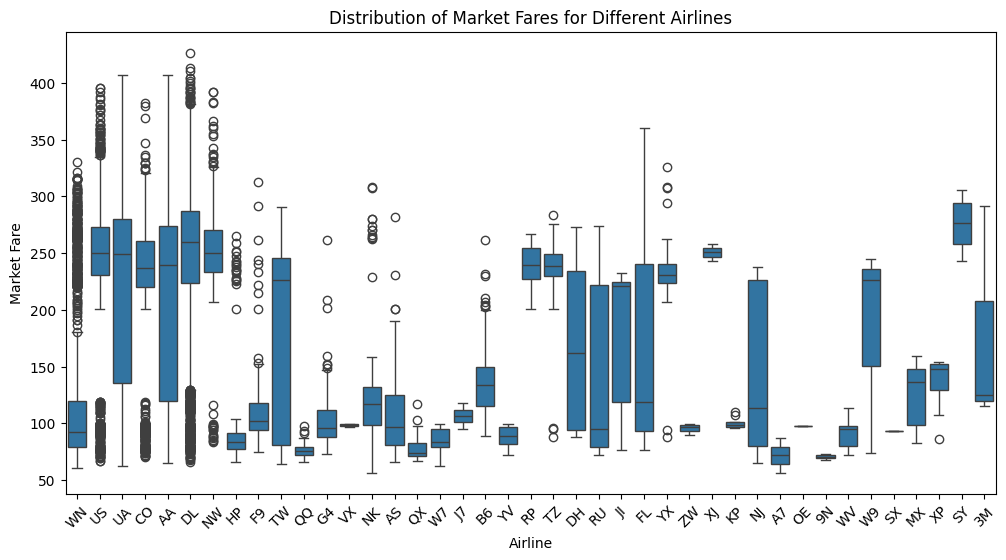

In [10]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="car", y="mkt_fare", data=df_airfare)
plt.xticks(rotation=45)
plt.title("Distribution of Market Fares for Different Airlines")
plt.xlabel("Airline")
plt.ylabel("Market Fare")
plt.show()

# Airlines exhibit a wide range of fare distributions, with some having large variations (wider boxes and whiskers), indicating fare flexibility.
# Several airlines have significant outliers, suggesting occasional high-priced flights due to demand surges or premium services.
# Some airlines have a tight range of fares, possibly reflecting standardized pricing strategies.


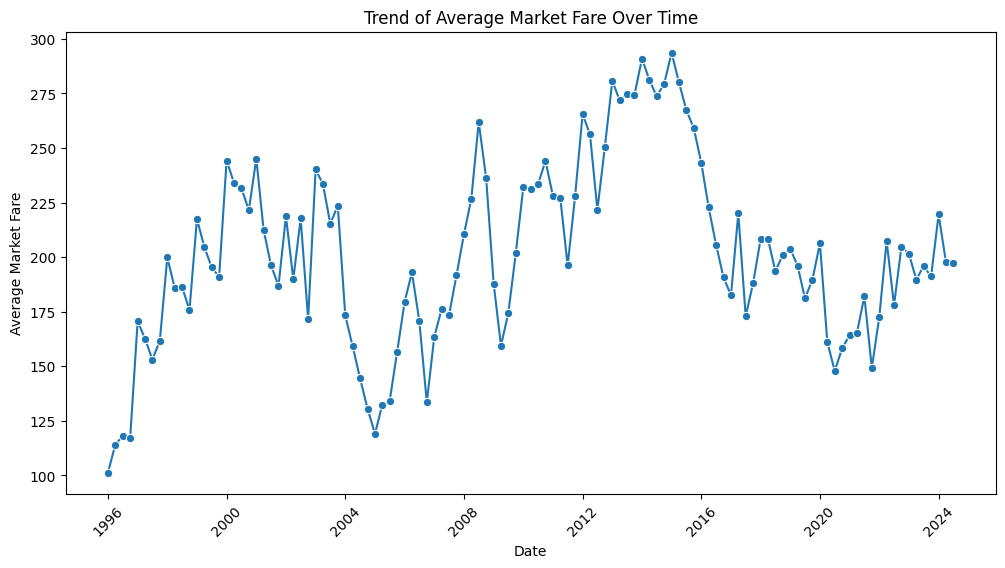

In [11]:
df_avg_fare = df_airfare.groupby("Date")["mkt_fare"].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x="Date", y="mkt_fare", data=df_avg_fare, marker="o")
plt.title("Trend of Average Market Fare Over Time")
plt.xlabel("Date")
plt.ylabel("Average Market Fare")
plt.xticks(rotation=45)
plt.show()

# The average market fare has seen fluctuations over time, with peaks and dips.
# There is a general upward trend until around 2015, followed by a decline, possibly due to changes in airline policies, fuel prices, or competition.
# The recent years show a stabilization with smaller fluctuations, suggesting market adjustments.

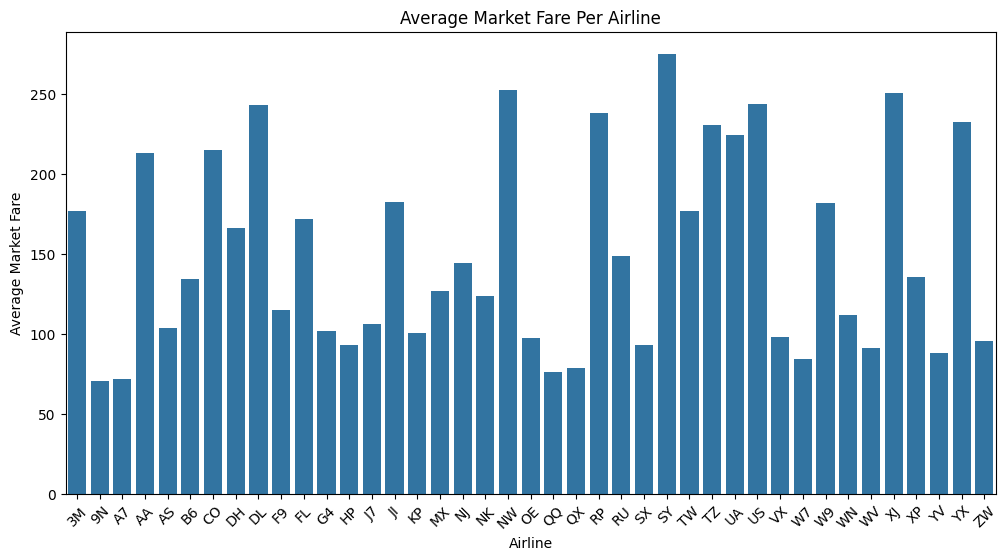

In [12]:
df_avg_fare_airline = df_airfare.groupby("car")["mkt_fare"].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x="car", y="mkt_fare", data=df_avg_fare_airline)
plt.xticks(rotation=45)
plt.title("Average Market Fare Per Airline")
plt.xlabel("Airline")
plt.ylabel("Average Market Fare")
plt.show()

# There is significant variation in market fares across different airlines.
# Some airlines have consistently higher fares, possibly due to premium services or longer routes.
# A few airlines have much lower average fares, indicating a focus on budget travel.

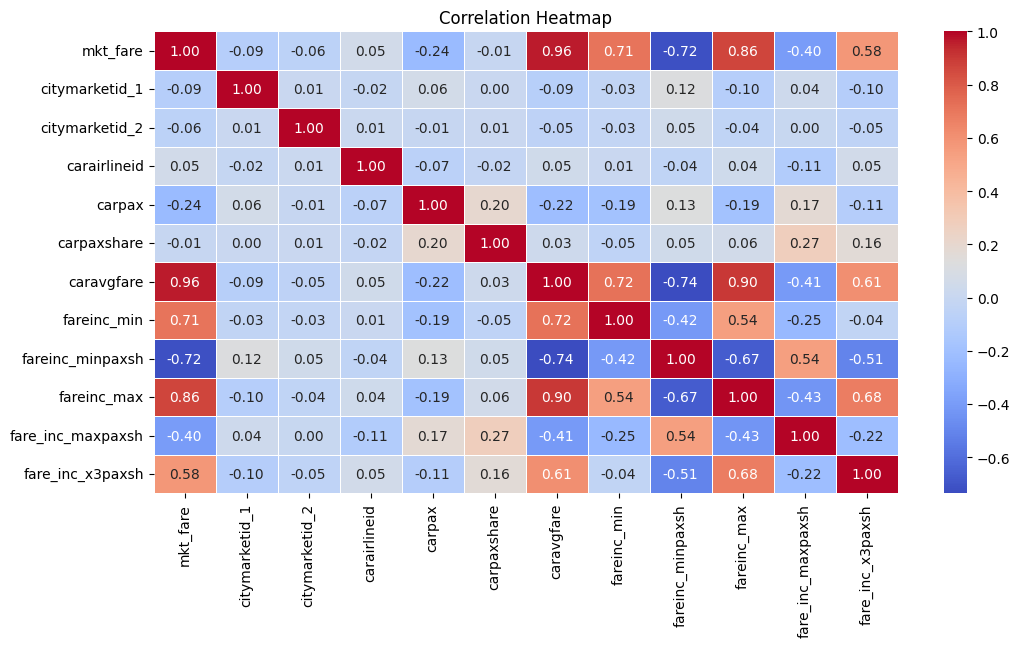

In [13]:
de.draw_correlation_heatmap(df_airfare)

In [14]:
df_airfare.drop(['fareinc_min', 'fareinc_minpaxsh', 'fareinc_max', 'fare_inc_maxpaxsh', 'fare_inc_x3paxsh', 'caravgfare'], axis=1, inplace=True)

Skewness:
 mkt_fare      -0.044629
carpax         8.362569
carpaxshare    0.547024
dtype: float64


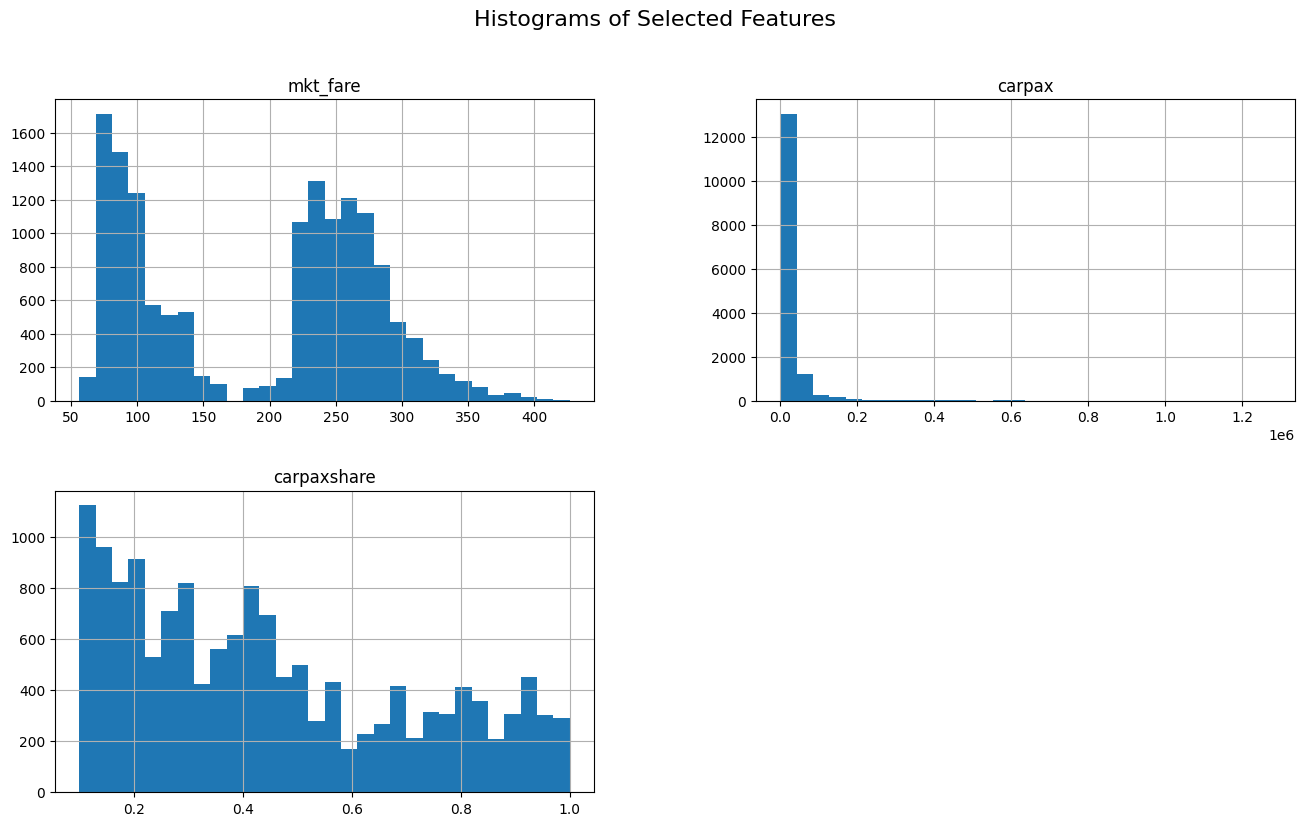

In [15]:
selected_cols = ['mkt_fare', 'carpax', 'carpaxshare']
de.draw_skewness_histogram(df_airfare, selected_cols=selected_cols)

In [16]:
num_cols = ['mkt_fare', 'carpax', 'carpaxshare']

de.print_outliers(df_airfare, num_cols=num_cols)

df_airfare = de.cap_outliers(df_airfare, 'mkt_fare')
df_airfare = de.cap_outliers(df_airfare, 'carpax')
df_airfare = de.cap_outliers(df_airfare, 'carpaxshare')

print()

de.print_outliers(df_airfare, num_cols=num_cols)

mkt_fare: 0 outliers detected (0.0%)
carpax: 1412 outliers detected (9.49%)
carpaxshare: 0 outliers detected (0.0%)

mkt_fare: 0 outliers detected (0.0%)
carpax: 0 outliers detected (0.0%)
carpaxshare: 0 outliers detected (0.0%)


In [17]:
num_cols = ['mkt_fare', 'carpax', 'carpaxshare']
df_airfare[num_cols] = de.scale_df(df_airfare, selected_columns=num_cols, type='scalar')

In [18]:
df_airfare.to_csv("../Data/consumer_airfare.csv")